In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
true = 12
np.random.seed(1)

In [3]:
mu = 10.4; sigma = 1.6

In [4]:
n = norm(mu, sigma)

In [5]:
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

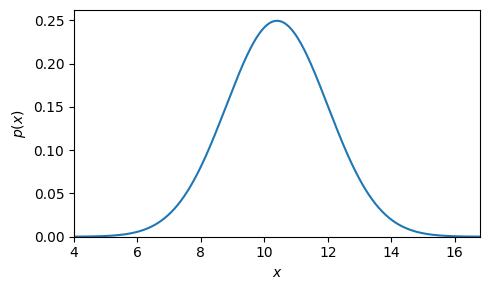

In [6]:
plt.subplots(figsize=(5,3))
plt.plot(x, n.pdf(x))
plt.ylim(0, None)
plt.xlim(x.min(), x.max())
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.tight_layout()
plt.savefig('./images/normal.png', dpi=600)

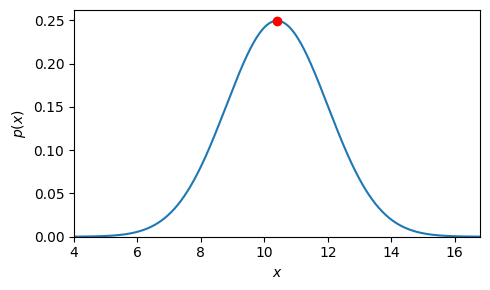

In [7]:
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
plt.subplots(figsize=(5,3))
plt.plot(x, n.pdf(x))
plt.plot(3.22490293 ** 2, n.pdf(3.22490293 ** 2), 'ro')
plt.ylim(0, None)
plt.xlim(x.min(), x.max())
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.tight_layout()
plt.savefig('./images/normal_fit.png', dpi=600)

In [8]:
x = np.linspace(1, 10, 5)
y = 4.1 * x + 2.3
y_noise = np.random.randn(x.size) * 2

y += y_noise
dy = np.abs(np.random.randn() * 2)

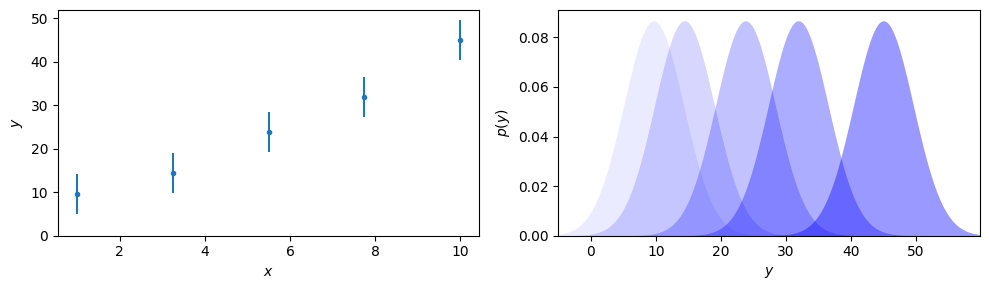

In [9]:
# x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].errorbar(x, y, dy, marker='.', ls='')
ax[0].set_ylim(0, None)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')

y_range = np.arange(-5, 60, 0.1)
for i, yy in enumerate(y):
    ax[1].fill_between(y_range, norm(yy, dy).pdf(y_range), color='b', alpha=0.08 * (i + 1), lw=0)
ax[1].set_xlim(y_range.min(), y_range.max())
ax[1].set_ylim(0, None)
ax[1].set_xlabel('$y$')
ax[1].set_ylabel('$p(y)$')
plt.tight_layout()
plt.savefig('./images/multid.png', dpi=600)

In [10]:
from scipy.stats import linregress

result = linregress(x, y)

In [11]:
result

LinregressResult(slope=3.924081095361491, intercept=3.3782964574790846, rvalue=0.9879454047637175, pvalue=0.001585900586944717, stderr=0.3549955784424238, intercept_stderr=2.2556889471543875)

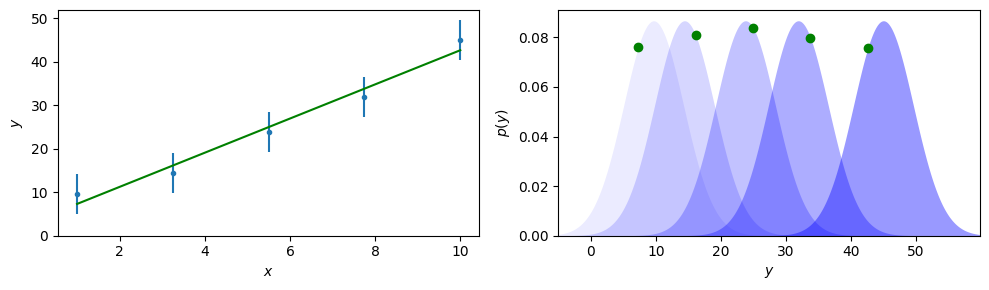

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].errorbar(x, y, dy, marker='.', ls='')
ax[0].plot(x, x * result.slope + result.intercept, 'g-')
ax[0].set_ylim(0, None)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')

y_range = np.arange(-5, 60, 0.1)
for i, yy in enumerate(y):
    ax[1].fill_between(y_range, norm(yy, dy).pdf(y_range), color='b', alpha=0.08 * (i + 1), lw=0)
    ax[1].plot(x[i] * result.slope + result.intercept, norm(yy, dy).pdf(x[i] * result.slope + result.intercept), 'go')
ax[1].set_xlim(y_range.min(), y_range.max())
ax[1].set_ylim(0, None)
ax[1].set_xlabel('$y$')
ax[1].set_ylabel('$p(y)$')
plt.tight_layout()
plt.savefig('./images/multid_fit.png', dpi=600)

In [13]:
from scipy.stats import uniform

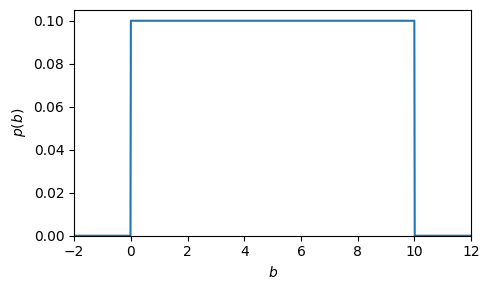

In [16]:
x = np.linspace(-2, 12, 1000)
plt.subplots(figsize=(5,3))
u = uniform(loc=0, scale=10)
plt.plot(x, u.pdf(x))
plt.ylim(0, None)
plt.xlim(x.min(), x.max())
plt.xlabel('$b$')
plt.ylabel('$p(b)$')
plt.tight_layout()
plt.savefig('./images/uniform.png', dpi=600)